In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tests = pd.read_csv('tests.csv')
utility = pd.read_csv('utility.csv')
train = pd.read_csv('train.csv')
welfare = pd.read_csv('welfare.csv')

train.update(tests)

# Insert Revenue and Regret from test_data into train_data
#train_data.update(test_data)

# Separate data without DP to make face plots more readable
#dp_data = train_data.query('Noise > 0').query('Clip > 0')
#no_dp_data = train_data.query('Noise == 0').query('Clip == 0')

In [3]:
midx_util = pd.MultiIndex.from_frame(utility.query("Agent == 0")[['Report','Utility']])

In [4]:
# Find max over all misreports
util = utility.query("Report > 0").groupby(['Iter','Agent','Noise','Clip','Exp'])['Utility'].max()

# Transform to df with index/columns
util_data = pd.DataFrame(pd.DataFrame(util).to_records()) 

In [5]:
# Find min revenue over all misreports
tr = train.groupby(['Iter','Noise','Clip','Exp'])['Revenue'].min()

# Transform to df with index/columns
train_data = pd.DataFrame(pd.DataFrame(tr).to_records())

In [6]:
# Find max regret over all misreports
reg = utility.query("Report > 0").groupby(['Iter','Agent','Noise','Clip','Exp'])['Regret'].max()

# Transform to df with index/columns
reg_data = pd.DataFrame(pd.DataFrame(reg).to_records()) 

In [7]:
# Find max regret over all misreports
reg_s = train.groupby(['Iter','Noise','Clip','Exp'])['Regret'].max()

# Transform to df with index/columns
reg_sum_data = pd.DataFrame(pd.DataFrame(reg_s).to_records())

In [8]:
# Find min welfare over all misreports
wel = welfare.groupby(['Iter','Noise','Clip','Exp'])['Welfare'].min()

# Transform to df with index/columns
wel_data = pd.DataFrame(pd.DataFrame(wel).to_records()) 

## NOTE: Sample size is 128 valuation sets (out of 32768) 

# Regret per agent

### Applying noise tightens regret bounds for misreporting Agent (Agent0) over all sampled valuation sets. See the first row of the following figure.

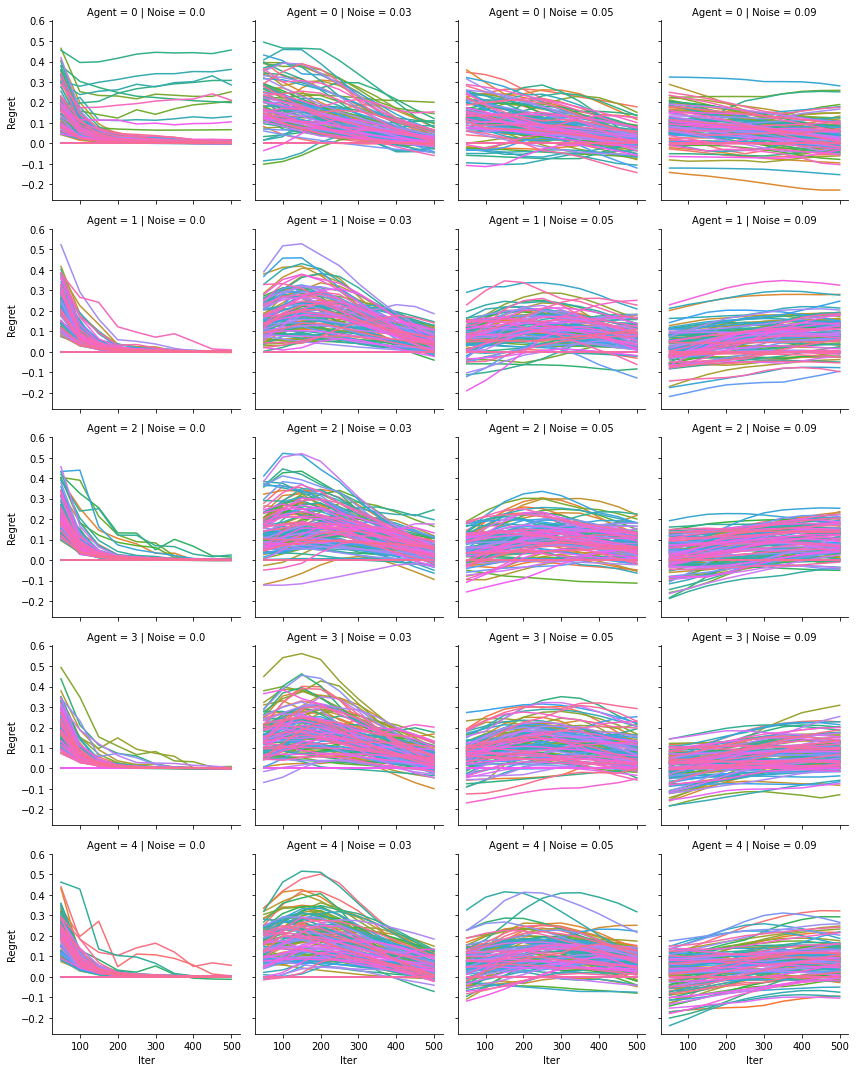

In [9]:
reg = sns.FacetGrid(reg_data, col='Noise', row='Agent', hue='Exp')
reg = reg.map(plt.plot, 'Iter', 'Regret')

# Sum Regret

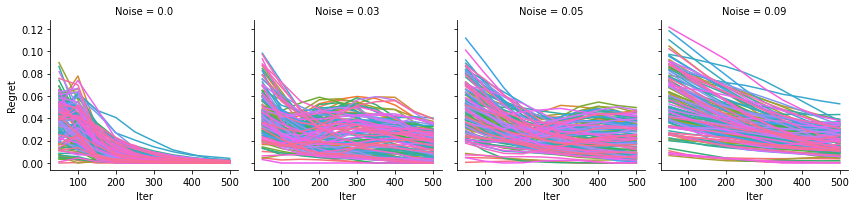

In [10]:
reg_sum = sns.FacetGrid(reg_sum_data, col='Noise', hue='Exp')
reg_sum = reg_sum.map(plt.plot, 'Iter', 'Regret')

# Utility

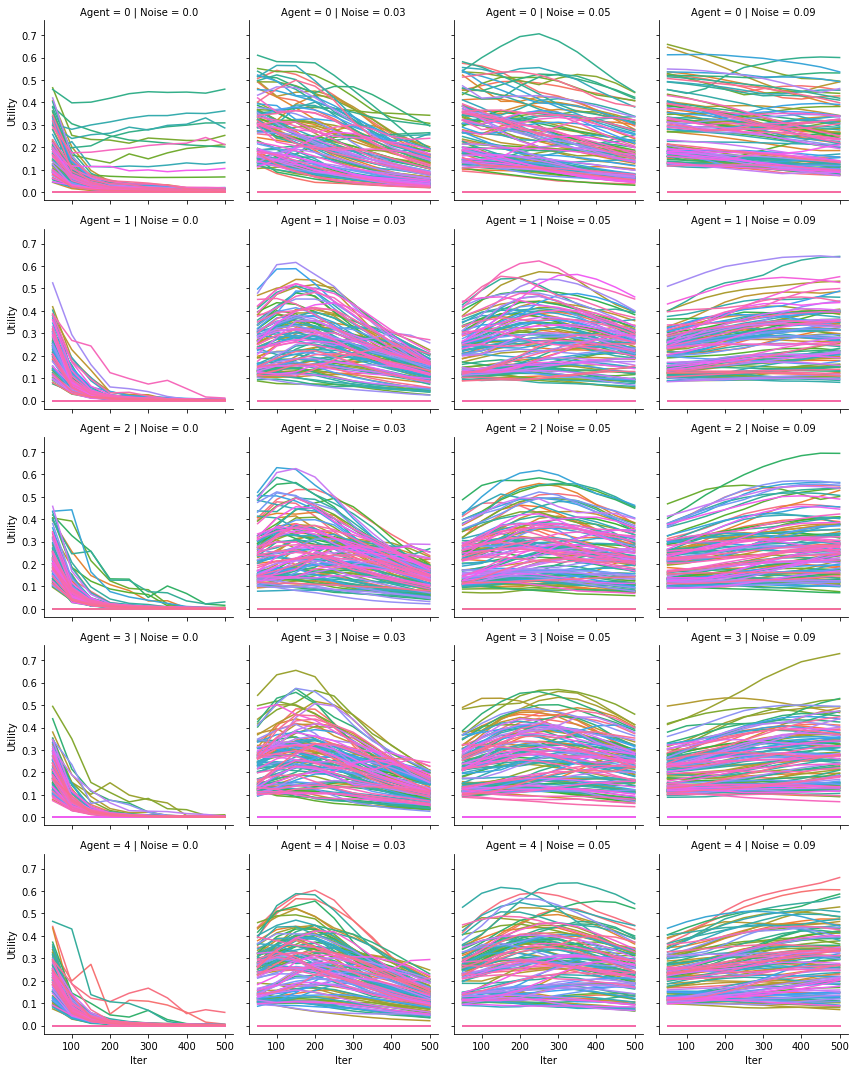

In [11]:
a = sns.FacetGrid(util_data, col='Noise', row='Agent', hue='Exp')
a = a.map(plt.plot, 'Iter', 'Utility')

# Welfare

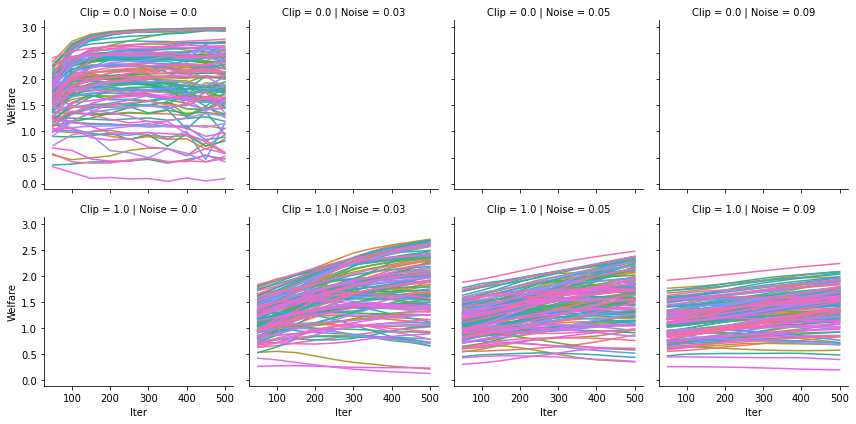

In [12]:
w = sns.FacetGrid(wel_data, col='Noise', row='Clip', hue='Exp')
w = w.map(plt.plot, 'Iter', 'Welfare')

# Revenue

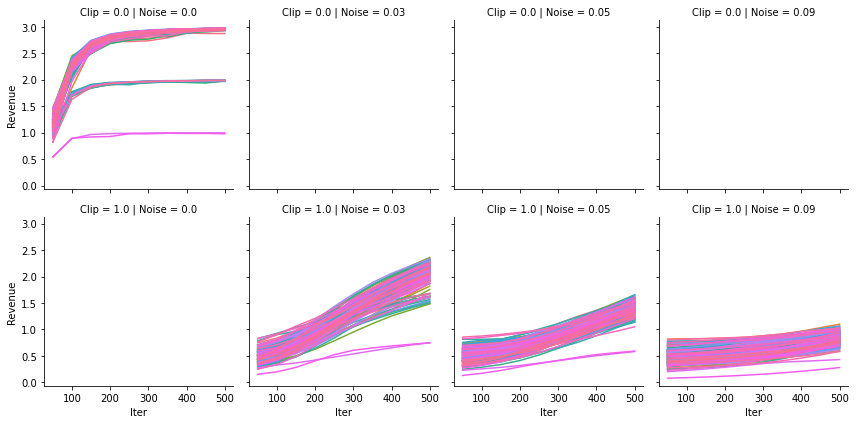

In [13]:
rev = sns.FacetGrid(train_data, col='Noise', row='Clip', hue='Exp')
rev = rev.map(plt.plot, 'Iter', 'Revenue')